In [1]:
# Import libaries
# As seen in HIEnsembleHindcast/ensemble_analysis.ipynb by L.Barnard ()
import HUXt as H
#import HIEnsembleHindcast as heh
#import HI_analysis as hip
import testing as TEST
import tables
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage
import numpy as np
import pandas as pd
import os 
from astropy.time import Time, TimeDelta
from astropy.visualization import time_support
import scipy.stats as st
from scipy.interpolate import interp1d
import glob
import math
import sunpy.coordinates.sun as sn
import h5py
import ensemble as ens
import matplotlib.ticker as ticker
from datetime import datetime, timedelta
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import Analysis2 as ana
import cmath

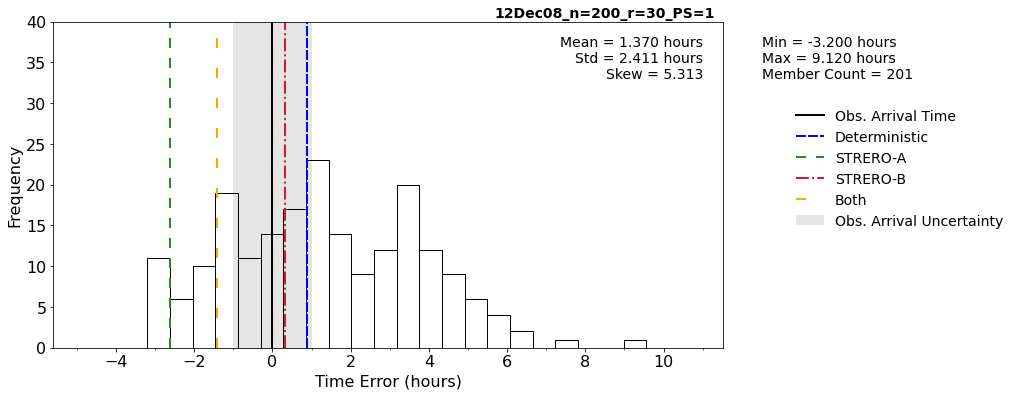

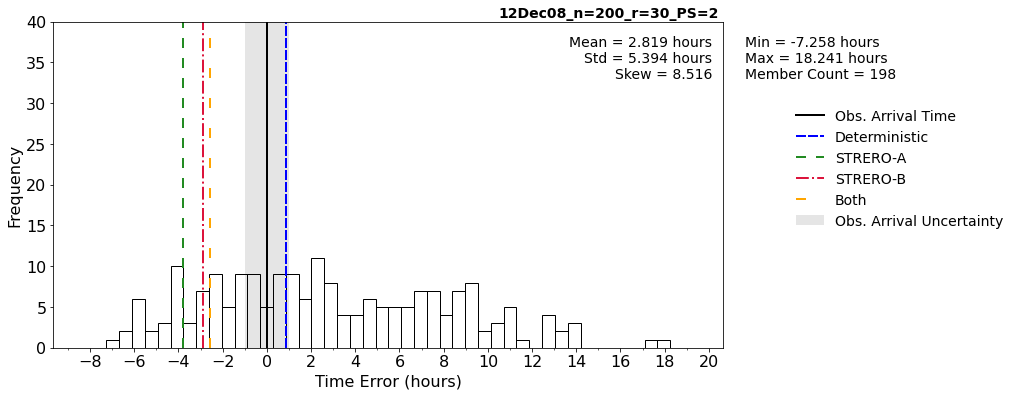

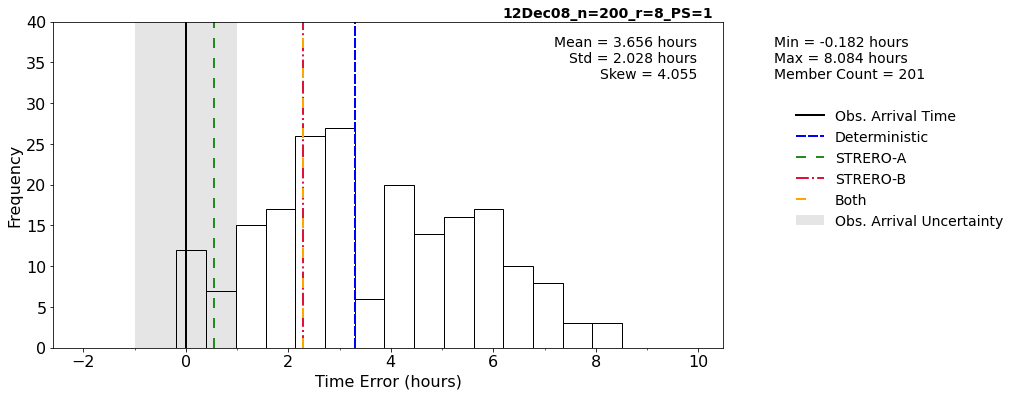

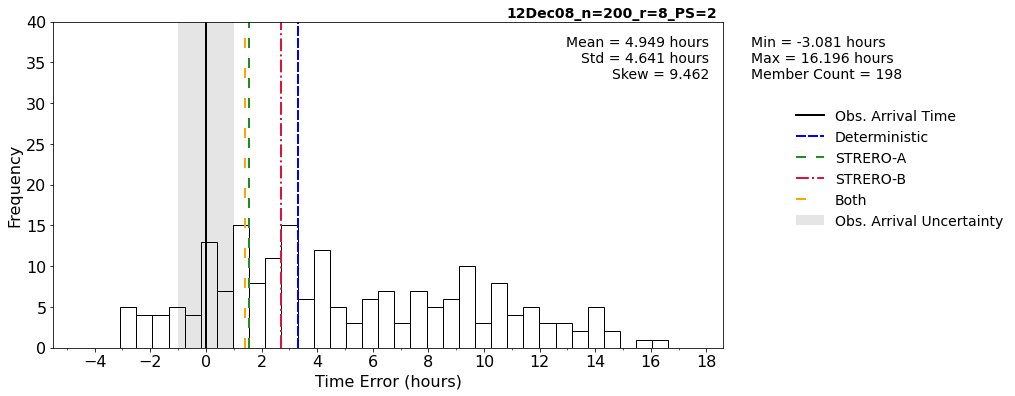

In [2]:
ana.ens_bar_plot('12Dec08_n=200_r=30_PS=1', save=True, tag_title=True)
ana.ens_bar_plot('12Dec08_n=200_r=30_PS=2', save=True, tag_title=True)
ana.ens_bar_plot('12Dec08_n=200_r=8_PS=1', save=True, tag_title=True)
ana.ens_bar_plot('12Dec08_n=200_r=8_PS=2', save=True, tag_title=True)


In [ ]:
ana.RMSEscatter(feature="N & F", view="both", tag="12Dec08_n=200_r=30_PS=2", tag_overlay="12Dec08_n=200_r=30_PS=1", overlay=True, title=True, save=True)
# ana.RMSEscatter(feature="N & F", view="both", tag="12Dec08_n=200_r=30_PS=2", title=True)
# ana.RMSEscatter(feature="N & F", view="both", tag="12Dec08_n=200_r=8_PS=1", title=True)
ana.RMSEscatter(feature="N & F", view="both", tag="12Dec08_n=200_r=8_PS=2", tag_overlay="12Dec08_n=200_r=8_PS=1", overlay=True,  title=True, save=True)

In [ ]:
ana.RMSEscatter(feature="N & F", view="A", tag="12Dec08_n=200_r=30_PS=1", title=True)
ana.RMSEscatter(feature="N & F", view="B", tag="12Dec08_n=200_r=30_PS=1", title=True)
ana.RMSEscatter(feature="nose", view="both", tag="12Dec08_n=200_r=30_PS=1", title=True)

***
#### Run from Analysis2.py script



The curve has fit f(x) = 0.008x^2 + -0.125x + 1.229.
The x solution is 7.849hrs ±3.707hrs with 68% CI or ±10.084hrs for 95% CI.
At the curve minimum, the RMSE (i.e., the y value) is 1.962˚


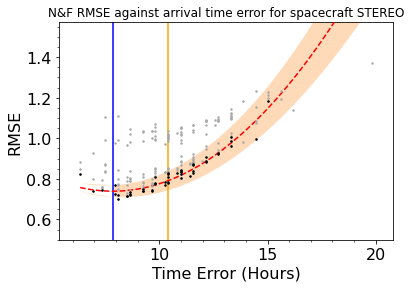

In [3]:
obsACE = Time('2008-12-16 07:00:00', format='iso').jd
percent = 25
feature = "N&F"
spacecraft = "STEREO"

x_solution = ana.RMSEandATEregression(tag="12Dec08_n=200_r=8_PS=1", obsACE=obsACE, feature=feature, spacecraft=spacecraft, percent=percent,plot=True, save=False)
# ana.lowestmemberplot(tag="12Dec08_n=200_r=30_PS=2", obsACE=obsACE, feature=feature, spacecraft=spacecraft, percent=percent, curve=True, save=False)
# ana.lowestmemberplot(tag="12Dec08_n=200_r=8_PS=\1", obsACE=obsACE, feature=feature, spacecraft=spacecraft, percent=percent, curve=True, save=False)
# ana.lowestmemberplot(tag="12Dec08_n=200_r=8_PS=2", obsACE=obsACE, feature=feature, spacecraft=spacecraft, percent=percent, curve=True, save=False)

In [3]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
obsACE = Time('2008-12-16 07:00:00', format='iso').jd
# percent = [100,90, 80, 70, 60, 50, 40, 30, 20, 10]
percent = [100,75,50,25,10]
feature = "flank"
spacecraft = "STEREO"

xdf = pd.DataFrame()
for percentage in percent:
    print(percentage,'%')
    x_solution = ana.RMSEandATEregression(tag="12Dec08_n=200_r=30_PS=2", obsACE=obsACE, feature=feature, spacecraft=spacecraft, percent=percentage,
                                          plot=True, save=False)
    xdf = pd.concat([xdf,x_solution], ignore_index=True)
    
display(xdf)
# plt.figure()
# plt.plot(xdf["x solution"], xdf["x uncertainty 1SD"], 'x')
# plt.plot(xdf["x solution"], xdf["x uncertainty 2SD"], '.')

# plt.xlabel("X solution"), plt.ylabel("Uncertainty")

The curve has fit f(x) = 0.023x^2 + -0.127x + 0.817.
The x solution is 2.811units ±0.531units with 68% CI or ±1.208units for 95% CI. Units are either hours for time for km/s for speed
At the curve minimum, the RMSE (i.e., the y value) is 0.638˚
The curve has fit f(x) = 0.012x^2 + -0.070x + 0.879.
The x solution is 2.919units ±0.639units with 68% CI or ±1.219units for 95% CI. Units are either hours for time for km/s for speed
At the curve minimum, the RMSE (i.e., the y value) is 0.776˚
Min X1 = -0.182(0.397), Max X1 = 8.084(8.084)
Min X2 = -3.081(-2.501), Max X2 = 16.196(13.877)


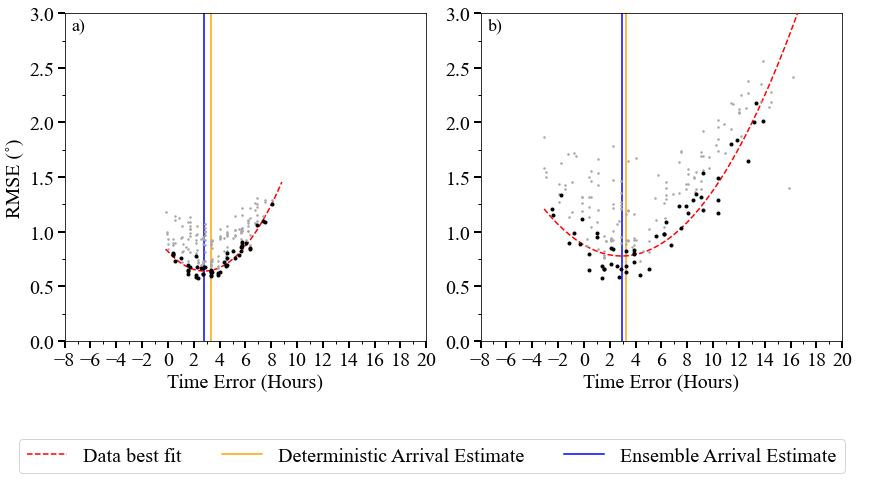

In [81]:
tag1 = "12Dec08_n=200_r=8_PS=1"
tag2 = "12Dec08_n=200_r=8_PS=2"
obsACE = Time('2008-12-16 07:00:00', format='iso').jd
percent = 25
feature = "N&F"
spacecraft = "STEREO"
xaxis = "time"

ana.paper_RMSEcompare(tag1, tag2, obsACE, feature, spacecraft,xaxis, percent, save=False)

# tag1 = "12Dec08_n=200_r=8_PS=1"
# tag2 = "12Dec08_n=200_r=8_PS=2"

# ana.paper_RMSEcompare(tag1, tag2, obsACE, feature, spacecraft, xaxis, percent, save=True)

The curve has fit f(x) = 0.000x^2 + -0.001x + 0.739.
The x solution is 5.937units ±2.987units with 68% CI or ±5.709units for 95% CI. Units are either hours for time for km/s for speed
At the curve minimum, the RMSE (i.e., the y value) is 0.737˚
The curve has fit f(x) = 0.000x^2 + -0.005x + 0.862.
The x solution is 22.022units ±8.460units with 68% CI or ±15.417units for 95% CI. Units are either hours for time for km/s for speed
At the curve minimum, the RMSE (i.e., the y value) is 0.806˚
The curve has fit f(x) = 0.000x^2 + 0.001x + 0.672.
The x solution is -3.983units ±3.364units with 68% CI or ±3.364units for 95% CI. Units are either hours for time for km/s for speed
At the curve minimum, the RMSE (i.e., the y value) is 0.670˚
The curve has fit f(x) = 0.000x^2 + -0.006x + 0.779.
The x solution is 11.876units ±4.898units with 68% CI or ±7.857units for 95% CI. Units are either hours for time for km/s for speed
At the curve minimum, the RMSE (i.e., the y value) is 0.744˚


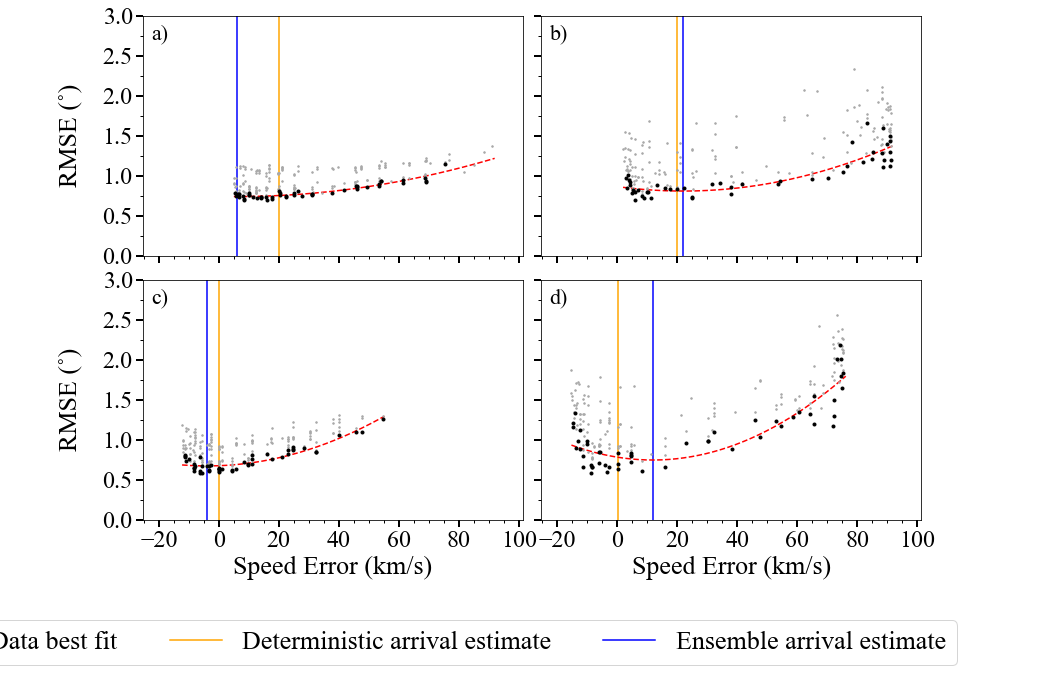

In [4]:
tag1 = "12Dec08_n=200_r=30_PS=1"
tag2 = "12Dec08_n=200_r=30_PS=2"
tag3 = "12Dec08_n=200_r=8_PS=1"
tag4 = "12Dec08_n=200_r=8_PS=2"
obsACE = Time('2008-12-16 07:00:00', format='iso').jd
percent = 25
feature = "N&F"
spacecraft = "STEREO"
xaxis = "speed"

ana.paper_RMSEATEdouble(tag1, tag2, tag3, tag4, obsACE, feature, spacecraft, xaxis, percent, save=False)

In [47]:
# Load in ACE MAGNETIC observation
df_aceMAG = pd.read_csv(r"AC_H2_MFI_226960.csv")
df_aceMAG = df_aceMAG.rename(columns={'EPOCH__yyyy-mm-ddThh:mm:ss.sssZ' : 'time',
                                      'BX_GSE_(@_x_component_)_nT':'Bx (nT)',
                                      'BY_GSE_(@_y_component_)_nT':'By (nT)',
                                      'BZ_GSE_(@_z_component_)_nT':'Bz (nT)'})
df_aceMAG['time'] = pd.to_datetime(df_aceMAG['time'])

# Load in ACE PROTON DENSITY observation
df_aceDEN = pd.read_csv(r"AC_H6_SWI_226960.csv")
df_aceDEN = df_aceDEN.rename(columns={'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ' : 'time',
                                      'PROTON_DENSITY_#/cm^3':'proton density (/cm3)'})
df_aceDEN['time'] = pd.to_datetime(df_aceDEN['time'])

# Load in ACE SOLAR WIND SPEED observation
df_aceSWS = pd.read_csv(r"AC_H2_SWE_226960.csv")
df_aceSWS = df_aceSWS.rename(columns={'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ' : 'time',
                                      'SW_H_SPEED_km/s':'Speed (km/s)'})
df_aceSWS['time'] = pd.to_datetime(df_aceSWS['time'])


arrival = Time("2008-12-16 07:00:00", format='iso').datetime


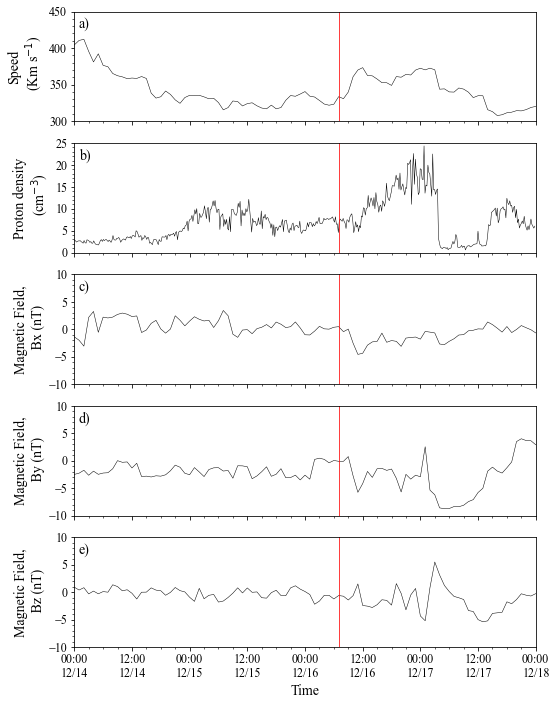

In [79]:
# Setup figure

plt.rcParams.update({'font.size': 22, 'axes.labelsize':14, 'legend.fontsize':16,'xtick.labelsize': 12.0,'ytick.labelsize': 12.0,"font.family":"Times New Roman"})
fig, axs = plt.subplots(5, 1, sharex=True, sharey=False, figsize=(8.27, 11.69))

axs[0].set_ylabel("Speed\n  (Km s$^{-1}$)")
axs[0].plot(df_aceSWS["time"],df_aceSWS["Speed (km/s)"], 'k', lw=0.5)
axs[0].set_ylim(bottom=300, top=450)
axs[0].yaxis.set_major_locator(MultipleLocator(50))
axs[0].yaxis.set_minor_locator(MultipleLocator(10))

axs[1].set_ylabel("Proton density\n  (cm$^{-3}$)")
axs[1].plot(df_aceDEN["time"],df_aceDEN["proton density (/cm3)"], 'k', lw=0.5)
axs[1].set_ylim(bottom=0, top=25)
axs[1].yaxis.set_major_locator(MultipleLocator(5))
axs[1].yaxis.set_minor_locator(MultipleLocator(1))

axs[2].set_ylabel("Magnetic Field,\n Bx (nT)")
axs[2].plot(df_aceMAG["time"],df_aceMAG["Bx (nT)"], 'k', lw=0.5)
axs[2].set_ylim(bottom=-10.0, top=10)
axs[2].yaxis.set_major_locator(MultipleLocator(5))
axs[2].yaxis.set_minor_locator(MultipleLocator(1))

axs[3].set_ylabel("Magnetic Field,\n By (nT)")
axs[3].plot(df_aceMAG["time"],df_aceMAG["By (nT)"], 'k', lw=0.5)
axs[3].set_ylim(bottom=-10, top=10)
axs[3].yaxis.set_major_locator(MultipleLocator(5))
axs[3].yaxis.set_minor_locator(MultipleLocator(1))

axs[4].set_ylabel("Magnetic Field,\n Bz (nT)")
axs[4].plot(df_aceMAG["time"],df_aceMAG["Bz (nT)"], 'k', lw=0.5)
axs[4].set_ylim(bottom=-10, top=10)
axs[4].yaxis.set_major_locator(MultipleLocator(5))
axs[4].yaxis.set_minor_locator(MultipleLocator(1))


axs[4].set_xlabel("Time")
axs[4].set_xlim(left= df_aceMAG.time.min() , right= df_aceMAG.time.max())
axs[4].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m/%d'))
axs[4].xaxis.set_minor_locator(mdates.HourLocator(interval=3))

for nn,ax in enumerate(axs):
    ax.axvline(x=arrival, ymin=-10, ymax=10,color='r', lw=0.75, label="Observed Arrival")
#     ax.axvline(x=Time("2008-12-16 10:17:00", format='iso').datetime, ymin=-10, ymax=10,color='blue', lw=0.75, label="BRaVDA back-mapped")
#     ax.axvline(x=Time("2008-12-16 10:44:00", format='iso').datetime, ymin=-10, ymax=10,color='green', lw=0.75, label="Tomography")
#     ax.axvline(x=Time("2008-12-16 07:52:00", format='iso').datetime, ymin=-10, ymax=10,color='dodgerblue', lw=0.75, label="BRaVDA")
#     ax.axvline(x=Time("2008-12-16 12:29:00", format='iso').datetime, ymin=-10, ymax=10,color='orange', lw=0.75, label="MAS")

axs[0].annotate("a)", xy=(0.01, 0.85), xycoords="axes fraction", fontsize=14)
axs[1].annotate("b)", xy=(0.01, 0.85), xycoords="axes fraction", fontsize=14)
axs[2].annotate("c)", xy=(0.01, 0.85), xycoords="axes fraction", fontsize=14)
axs[3].annotate("d)", xy=(0.01, 0.85), xycoords="axes fraction", fontsize=14)
axs[4].annotate("e)", xy=(0.01, 0.85), xycoords="axes fraction", fontsize=14)

# plt.subplots_adjust(bottom=0.1, hspace=0.1)
# plt.legend(loc='center', ncol=3, fontsize=14)

plt.show()

project_dirs = H._setup_dirs_()
        
filename = "12Dec08CME_ACEobservations_plot.png".format(tag1,feature, percent)
filepath = os.path.join(project_dirs['HUXt_figures'], filename)            
fig.savefig(filepath, dpi=300, bbox_inches='tight')

filename = "12Dec08CME_ACEobservations_plot.pdf".format(tag1,feature, percent)
filepath = os.path.join(project_dirs['HUXt_figures'], filename)
fig.savefig(filepath, dpi=300, bbox_inches='tight')

***
# Lead Time Ensemble Anaysis #

In [26]:
tagtemp = "12Dec08_n=200_r=30_PS=1_cumulativeRMSE.csv"
project_dirs = H._setup_dirs_()
pathX = os.path.join(project_dirs['HUXt_data'], tagtemp)
RMSEDFtemp = pd.read_csv(r"{}".format(pathX))
RMSEDFtemp = RMSEDFtemp.drop(columns=['Unnamed: 0'])



In [45]:
RMSEDFtemp
# Seek subset of data for N observations
Nobs = 10
dfdf = RMSEDFtemp[RMSEDFtemp['# obs']==10.0]
dfdf

# Seek subset based on time of last observation 
# Using STEREO-B time tag since this is 36 seconds later. 

timearray = RMSEDFtemp['TIME B'][0:42].to_numpy()
dftime = RMSEDFtemp[RMSEDFtemp["TIME B"]==timearray[15]]
display(dftime)

['2008-12-12 15:29:37' '2008-12-12 16:09:36' '2008-12-12 16:49:37'
 '2008-12-12 17:29:37' '2008-12-12 18:09:36' '2008-12-12 18:49:36'
 '2008-12-12 19:29:36' '2008-12-12 20:09:36' '2008-12-12 20:49:36'
 '2008-12-12 21:29:36' '2008-12-12 22:09:36' '2008-12-12 22:49:37'
 '2008-12-12 23:29:36' '2008-12-13 00:09:36' '2008-12-13 00:49:36'
 '2008-12-13 01:29:36' '2008-12-13 02:09:36' '2008-12-13 02:49:36'
 '2008-12-13 03:29:36' '2008-12-13 04:09:36' '2008-12-13 04:49:36'
 '2008-12-13 05:29:36' '2008-12-13 06:09:36' '2008-12-13 06:49:36'
 '2008-12-13 07:29:36' '2008-12-13 08:09:36' '2008-12-13 08:49:36'
 '2008-12-13 09:29:36' '2008-12-13 10:09:36' '2008-12-13 10:49:37'
 '2008-12-13 11:29:37' '2008-12-13 12:09:36' '2008-12-13 12:49:37'
 '2008-12-13 13:29:37' '2008-12-13 14:09:36' '2008-12-13 14:49:37'
 '2008-12-13 15:29:37' '2008-12-13 16:09:36' '2008-12-13 16:49:36'
 '2008-12-13 17:29:36' '2008-12-13 18:09:36' '2008-12-13 18:49:36']


,# obs,TIME A,RMSE flank A,RMSE nose A,RMSE two A,TIME B,RMSE flank B,RMSE nose B,RMSE two B,total error A,count A,total error B,count B,error combined,count combined,RMSE combined,model tag
15,10.0,2008-12-13 01:29:01,0.402908,0.430997,0.415627,2008-12-13 01:29:36,0.417549,0.754579,0.609810,3.109419,18.0,7.437366,20.0,10.546785,38.0,0.526827,deterministic
57,10.0,2008-12-13 01:29:01,0.190199,1.025173,0.697997,2008-12-13 01:29:36,0.463697,0.667824,0.574893,8.769588,18.0,6.610030,20.0,15.379619,38.0,0.636181,ensemble_00
99,10.0,2008-12-13 01:29:01,0.161536,0.877814,0.597467,2008-12-13 01:29:36,0.255265,0.468198,0.377074,6.425396,18.0,2.843695,20.0,9.269091,38.0,0.493886,ensemble_01
141,10.0,2008-12-13 01:29:01,0.260394,0.524966,0.400192,2008-12-13 01:29:36,0.418669,0.797807,0.637095,2.882764,18.0,8.117789,20.0,11.000553,38.0,0.538041,ensemble_02
183,10.0,2008-12-13 01:29:01,0.316384,0.585043,0.455777,2008-12-13 01:29:36,0.440092,0.767262,0.625449,3.739194,18.0,7.823721,20.0,11.562915,38.0,0.551622,ensemble_03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247,10.0,2008-12-13 01:29:01,0.425201,0.103534,0.324355,2008-12-13 01:29:36,0.740451,1.151989,0.968335,1.893712,18.0,18.753465,20.0,20.647177,38.0,0.737121,ensemble_195
8289,9.0,2008-12-13 01:29:01,0.238891,0.747303,0.541312,2008-12-13 01:29:36,0.113652,0.386411,0.284807,4.981314,17.0,1.460070,18.0,6.441384,35.0,0.428998,ensemble_196
8331,10.0,2008-12-13 01:29:01,0.264583,0.551340,0.417123,2008-12-13 01:29:36,0.426567,0.732030,0.599094,3.131851,18.0,7.178280,20.0,10.310131,38.0,0.520883,ensemble_197
8373,10.0,2008-12-13 01:29:01,0.226716,0.430997,0.333339,2008-12-13 01:29:36,0.417549,0.754579,0.609810,2.000070,18.0,7.437366,20.0,9.437437,38.0,0.498351,ensemble_198


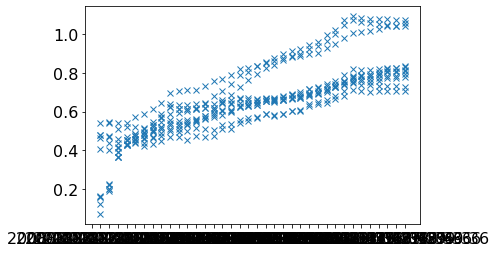